In [42]:
%pylab inline
from pathlib import Path
import json
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [43]:
metric_to_name = {
    'avg_reward': 'train reward (normalized)',
    'test_reward': 'test reward (normalized)',
}

In [47]:
def plot_logfiles(logfiles, metric='test_reward', print_meta=False):
    dfs = []
    for logfile in logfiles:
        with open(logfile, 'r') as f:
            meta_info = f.readline()
            if print_meta:
                print(meta_info)
            dfs.append(pd.read_json(f, lines=True))
    
    concatdf = pd.concat(dfs, ignore_index=True)

    sns.lineplot(data=concatdf, x='episode', y=f'{metric}_A', label='agent A')
    sns.lineplot(data=concatdf, x='episode', y=f'{metric}_B', label='agent B')
    plt.ylabel(metric_to_name[metric])
    plt.legend()


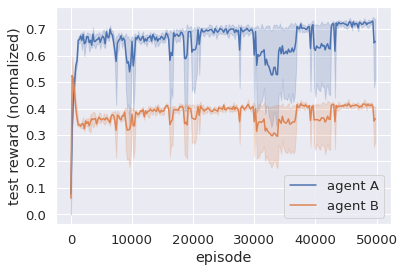

In [48]:
with sns.plotting_context('paper'):
    sns.set(font_scale=1.2)
    logfiles = [path for path in Path('../logs/beluga').glob('self-both-seed_8623548_*.log')]
    plot_logfiles(logfiles, 'test_reward')